## Problem 1

In [11]:
TPR = .999 # TPR = sensity = percent of sick people correctly given "positive" 
TNR = .99 # TNR = specificity = percent of healthy people correctly given "negative" 
prevalence = .0002 # percent of people who are sick

def P_healthy_given_positive(TPR, TNR, prevalence):
    P_FP = (1-prevalence) * (1-TNR) # percent of all tests that are false positives = (% healthy) * (1 - TNR)
    P_TP = prevalence * TPR # percent of all tests that are true positives = (% sick) * (TPR)

    P_healthy_given_positive = P_FP / (P_FP + P_TP) # numerator is % of tests that are FP, denom is % of tests that say "positive"

    return P_healthy_given_positive


P_problem1 = P_healthy_given_positive(TPR,TNR,prevalence)
print(f"P(healthy | positive test) = {P_problem1:.2f}")

print(f"\nTherefore, if you test 'positive' there is still a {P_problem1*100:.0f}% chance you are healthy.")

P(healthy | positive test) = 0.98

Therefore, if you test 'positive' there is still a 98% chance you are healthy.


## Problem 2

### mean
<img src="hw2p2_1.png" width="600">

### variance
<img src="hw2p2_2.png" width="600">

### skewness
<img src="hw2p2_3.png" width="600">

### kurtosis
<img src="hw2p2_4.png" width="600">

## Problem 3

### Binomial Distribution

N = 10
Mean of means = 10.60
Standard Deviation of means = 0.54


N = 100
Mean of means = 10.49
Standard Deviation of means = 0.20


N = 1000
Mean of means = 10.50
Standard Deviation of means = 0.05




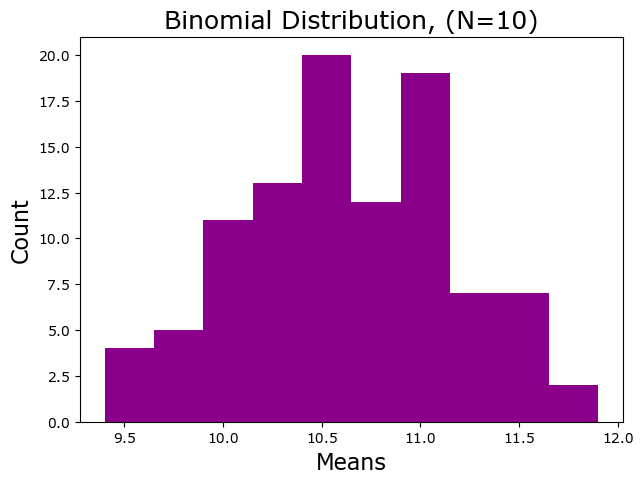

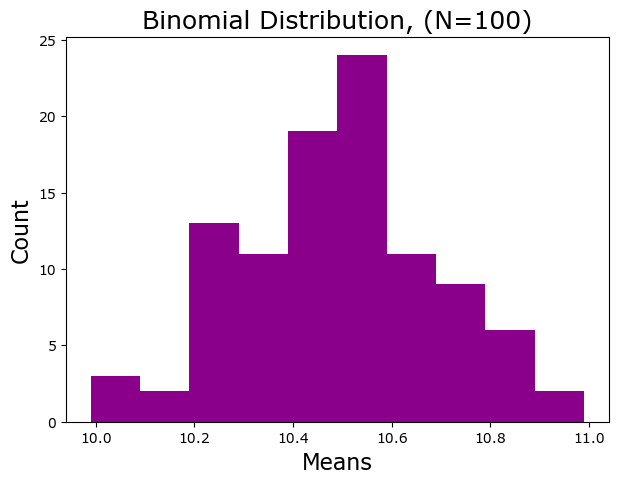

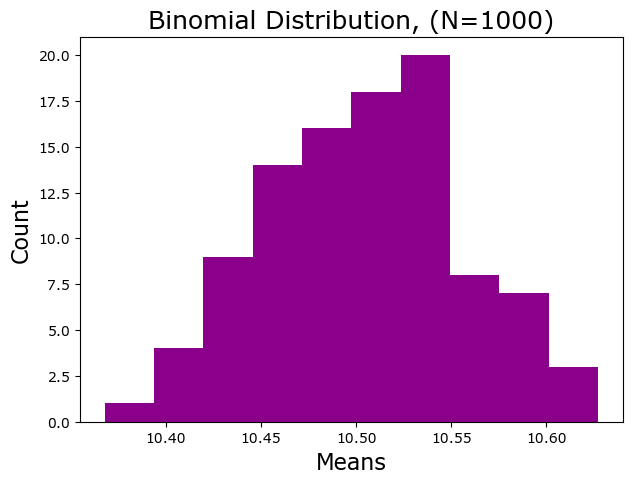

In [40]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Verdana'

N_vals = [10,100,1000]

for N in N_vals:
    samples = np.random.binomial(n=15, p=0.7, size=(100,N))
    means = np.mean(samples, axis=1)
    mean_of_means = np.mean(means)
    std_of_means = np.std(means)
    
    fig,ax = plt.subplots(figsize=(7,5))
    ax.hist(means, color="darkmagenta")
    ax.set_xlabel("Means", fontsize=16)
    ax.set_ylabel("Count", fontsize=16)
    ax.set_title(f"Binomial Distribution, (N={N})", fontsize=18)

    print(f"N = {N}")
    print(f"Mean of means = {mean_of_means:.2f}")
    print(f"Standard Deviation of means = {std_of_means:.2f}\n\n")

### $\chi^2$ Distribution

N = 10
Mean of means = 6.19
Standard Deviation of means = 1.00


N = 100
Mean of means = 5.95
Standard Deviation of means = 0.34


N = 1000
Mean of means = 5.99
Standard Deviation of means = 0.12




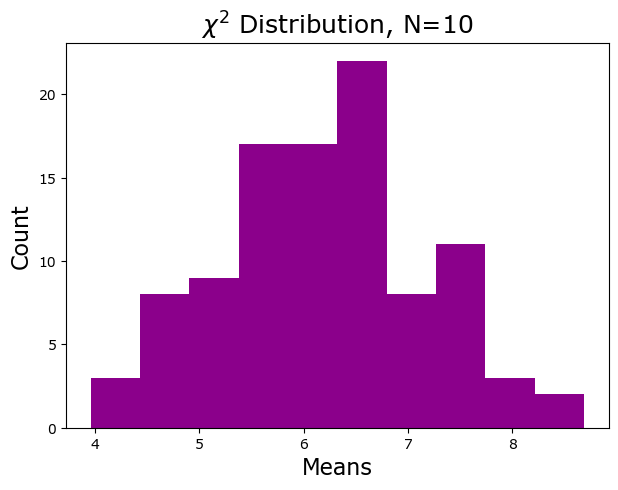

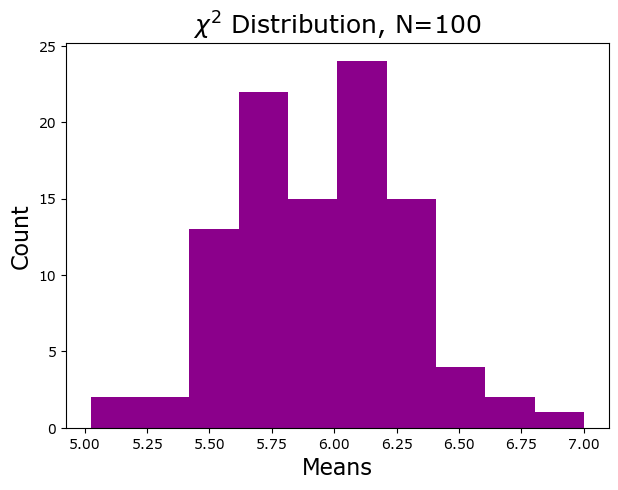

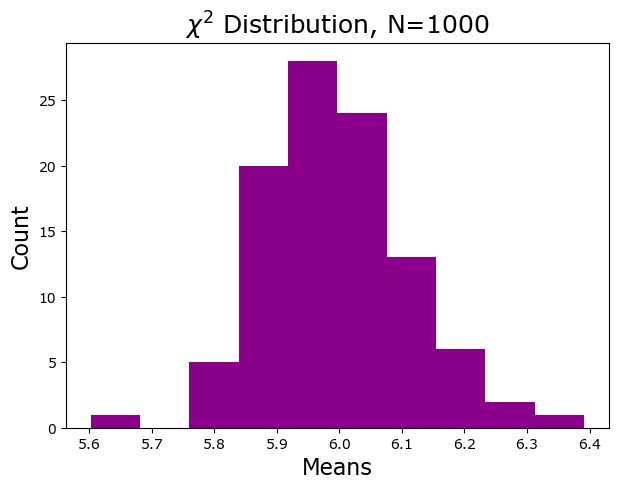

In [42]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Verdana'

N_vals = [10,100,1000]

for N in N_vals:
    samples = np.random.chisquare(df=6, size=(100,N))
    means = np.mean(samples, axis=1)
    mean_of_means = np.mean(means)
    std_of_means = np.std(means)
    
    fig,ax = plt.subplots(figsize=(7,5))
    ax.hist(means, color="darkmagenta")
    ax.set_xlabel("Means", fontsize=16)
    ax.set_ylabel("Count", fontsize=16)
    ax.set_title(f"$\chi^2$ Distribution, N={N}", fontsize=18)

    print(f"N = {N}")
    print(f"Mean of means = {mean_of_means:.2f}")
    print(f"Standard Deviation of means = {std_of_means:.2f}\n\n")

### Student's T Distribution

N = 10
Mean of means = 0.07
Standard Deviation of means = 0.61


N = 100
Mean of means = -0.01
Standard Deviation of means = 0.16


N = 1000
Mean of means = 0.00
Standard Deviation of means = 0.05




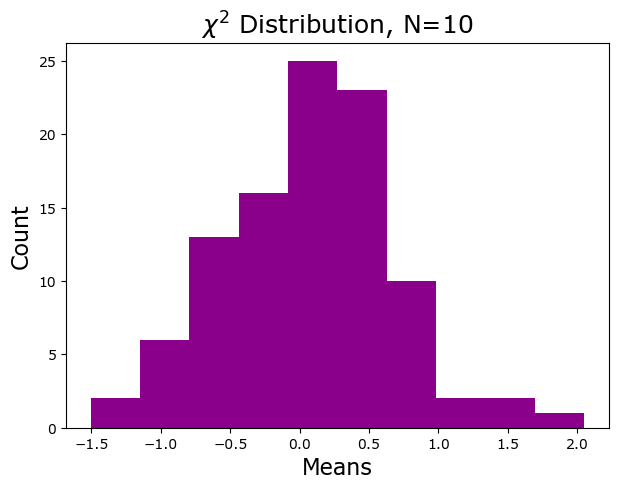

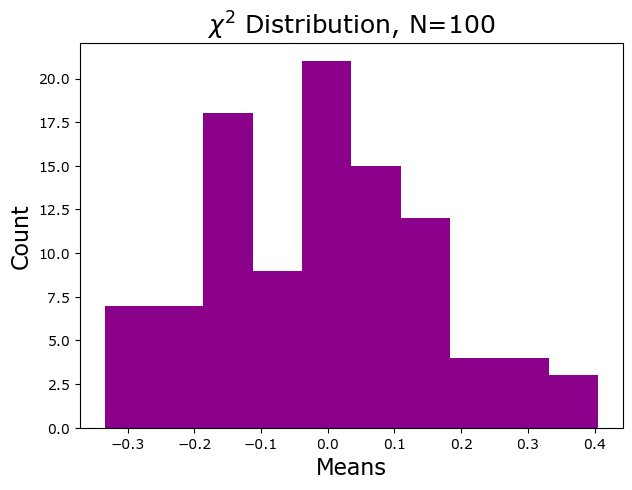

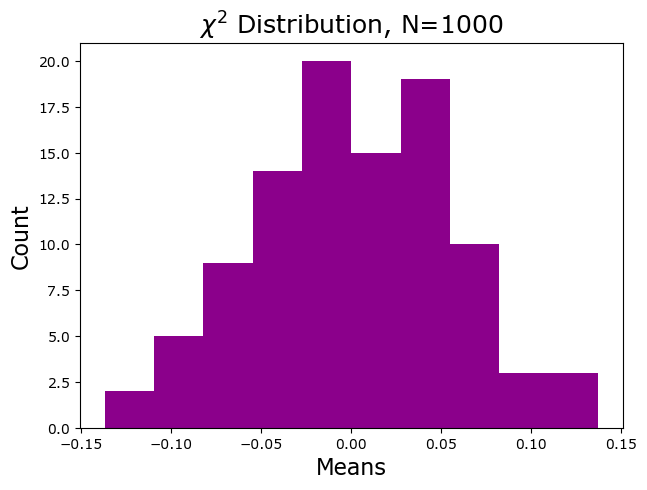

In [45]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Verdana'

N_vals = [10,100,1000]

for N in N_vals:
    samples = np.random.standard_t(df=3, size=(100,N))
    means = np.mean(samples, axis=1)
    mean_of_means = np.mean(means)
    std_of_means = np.std(means)
    
    fig,ax = plt.subplots(figsize=(7,5))
    ax.hist(means, color="darkmagenta")
    ax.set_xlabel("Means", fontsize=16)
    ax.set_ylabel("Count", fontsize=16)
    ax.set_title(f"$\chi^2$ Distribution, N={N}", fontsize=18)

    print(f"N = {N}")
    print(f"Mean of means = {mean_of_means:.2f}")
    print(f"Standard Deviation of means = {std_of_means:.2f}\n\n")

## Problem 4

In [146]:
from scipy import integrate
from scipy.interpolate import interp1d

def asym_gauss_pdf(x, sigma_L, sigma_R): # NOT normalized
    x = np.array(x)
    sigma = np.zeros_like(x)
    sigma[x<0] = sigma_L
    sigma[x>=0] = sigma_R

    return np.exp(-x**2/(2*sigma**2))

def asym_gauss_cdf(x, sigma_L, sigma_R): # normalized!
    normalization, _ = integrate.quad(asym_gauss_pdf, -np.inf, np.inf, args=(sigma_L,sigma_R))
    integration = np.array([integrate.quad(asym_gauss_pdf, -np.inf, x, args=(sigma_L,sigma_R))[0] for x in x])
    return integration/normalization

def asym_gauss_inv_cdf(u, sigma_L, sigma_R):
    xs = np.linspace(-10,10,1000)
    ys = asym_gauss_cdf(xs, sigma_L, sigma_R)
    inv_cdf = interp1d(ys, xs, bounds_error=False, fill_value='extrapolate')
    return inv_cdf(u)

def asym_gauss_sampler(sigma_L, sigma_R, N):
    u = np.random.uniform(0, 1, size=N)
    return asym_gauss_inv_cdf(u, sigma_L, sigma_R)

Text(0.5, 1.0, 'Asymmetrical Gaussian, N=1000000')

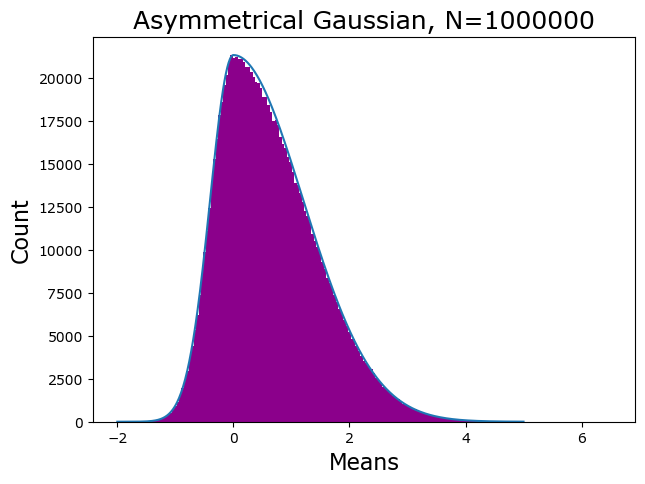

In [213]:
sigma_L=.4
sigma_R=1.2
N = 10**6

sample = asym_gauss_sampler(sigma_L, sigma_R, N)
fig,ax = plt.subplots(figsize=(7,5))
counts,_,_ = ax.hist(sample, color="darkmagenta",bins=200)
xs = np.linspace(-2,5,600)
ys = asym_gauss_pdf(xs,sigma_L,sigma_R)
ax.plot(xs,ys*counts.max())
ax.set_xlabel("Means", fontsize=16)
ax.set_ylabel("Count", fontsize=16)
ax.set_title(f"Asymmetrical Gaussian, N={N}", fontsize=18)
# ax.set_xlim()

## Problem 5

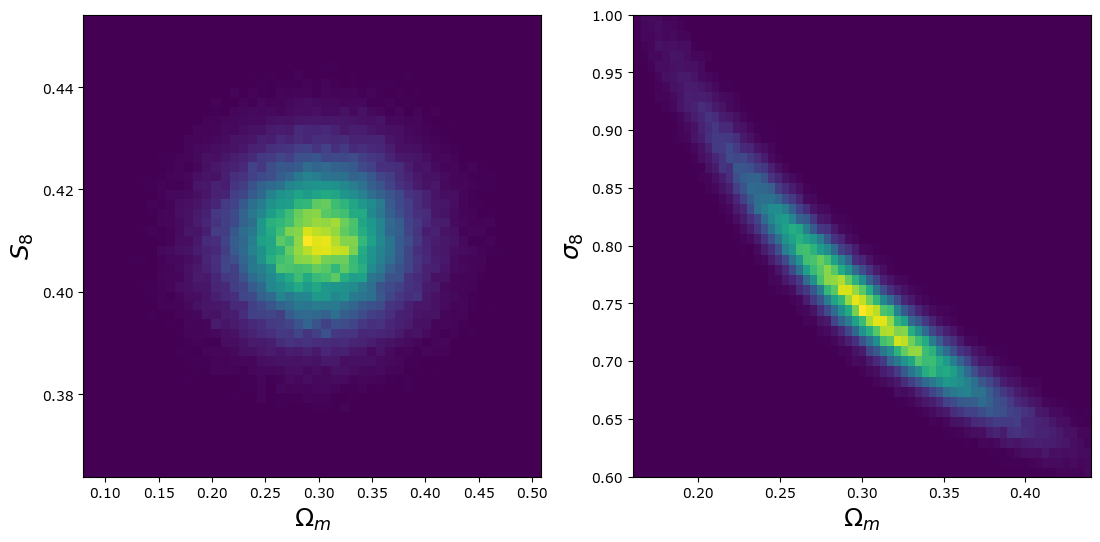

In [211]:
S8_mean = .41
S8_std = .01

Omega_m_mean = .3
Omega_m_std = .05

S8_sample = np.random.normal(loc=S8_mean, scale=S8_std, size=100000)
Omega_m_sample = np.random.normal(loc=Omega_m_mean, scale=Omega_m_std, size=100000)


fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(13,6))
ax[0].hist2d(Omega_m_sample,S8_sample, bins=50)
ax[0].set_xlabel("$\Omega_m$",fontsize=18)
ax[0].set_ylabel("$S_8$", fontsize=18)

sigma8_sample = S8_sample/np.sqrt(Omega_m_sample)

ax[1].hist2d(Omega_m_sample, sigma8_sample, bins=100)
ax[1].set_xlabel("$\Omega_m$",fontsize=18)
ax[1].set_ylabel("$\sigma_8$", fontsize=18)
ax[1].set_xlim(.16,.44)
ax[1].set_ylim(.6,1)
plt.show()

The $S_8$ parameter is useful because it allows us to see the data mapped onto a uniform 2d gaussian distribution. This essentially decorrelates the two values. This is helpful because it allows one to investigate and compare one parameter (between different surveys) without having high dependency on other parameters.